In [ ]:
#!pip install pandas scikit-learn mljar-supervised h2o

In [1]:
# MLJAR AutoML - All Features
from supervised.automl import AutoML
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv("athletes_v2.csv")
df.head(2)

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,total_lift
0,South East,Male,35,69,192,295,225,465,400,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,4+ years|,1385
1,Latin America,Male,27,68,164,254,187,397,397,I weigh and measure my food|I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,1235


In [3]:
# Create mapping for gender column
gender_mapping = {'Male': 0, 'Female': 1, '--': 1}

# Apply mapping to create new column in both datasets
df['upd_gender'] = df['gender'].map(gender_mapping)

In [4]:
# Create mapping for howlong column with partial matching
def map_howlong(value):
    if '4+ years' in value:
        return 4
    elif '2-4 years' in value:
        return 3
    elif '1-2 years' in value:
        return 2
    elif '6-12 months' in value:
        return 1
    elif 'Less than 6 months' in value:
        return 0
    else:
        return None

# Apply mapping to create new column in both datasets
df['upd_howlong'] = df['howlong'].apply(map_howlong)

In [5]:
df.head(2)

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,total_lift,upd_gender,upd_howlong
0,South East,Male,35,69,192,295,225,465,400,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,4+ years|,1385,0,4
1,Latin America,Male,27,68,164,254,187,397,397,I weigh and measure my food|I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,1235,0,3


In [6]:
numeric_cols = ['age', 'upd_gender', 'height', 'weight', 'upd_howlong'] #leakage - 'candj', 'snatch', 'deadlift', 'backsq',

In [7]:
# Separate features and target
X = df[numeric_cols]
y = df["total_lift"]

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create AutoML model
automl_all = AutoML(
    mode="Compete",  # best for fast experiments
    total_time_limit=600,  # 10 minutes total
    eval_metric="rmse",
    algorithms=["Linear", "Random Forest", "Xgboost", "LightGBM", "Extra Trees"]
)
automl_all.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'Xgboost', 'LightGBM', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 177.319686 trained in 0.19 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 4 models
1_DecisionTree rmse 177.319686 trained in 0.19 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
Skip simple_al

c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\an

14_LightGBM_KMeansFeatures rmse 154.164483 trained in 13.02 seconds


c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\anaconda3\envs\mlops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
c:\Users\John\an

10_Xgboost_KMeansFeatures rmse 154.496066 trained in 11.97 seconds
* Step insert_random_feature will try to check up to 1 model
* Step insert_random_feature will try to check up to 1 model
14_LightGBM_RandomFeature rmse 154.125634 trained in 30.93 seconds
14_LightGBM_RandomFeature rmse 154.125634 trained in 30.93 seconds
Drop features ['random_feature']
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 17 models
Drop features ['random_feature']
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 17 models
41_LightGBM rmse 154.098558 trained in 11.23 seconds
41_LightGBM rmse 154.098558 trained in 11.23 seconds
42_Xgboost_GoldenFeatures rmse 154.003632 trained in 9.7 seconds
42_Xgboost_GoldenFeatures rmse 154.003632 trained in 9.7 seconds
43_Xgboost_GoldenFeatures rmse 154.151547 trained in 7.25 seconds
43_Xgboost_GoldenFeatures rmse 154.151547 trained in 7.25 seconds
44_Xg

AutoML(algorithms=['Linear', 'Random Forest', 'Xgboost', 'LightGBM',
                   'Extra Trees'],
       eval_metric='rmse', mode='Compete', total_time_limit=600)

In [10]:
# Leaderboard
leaderboard_all = automl_all.get_leaderboard()
leaderboard_all_sorted = leaderboard_all.sort_values(by="metric_value", ascending=False)
print("Top Models (All Features) - Ordered by metric_value:")
print(leaderboard_all_sorted[["model_type", "metric_value", "train_time"]])

Top Models (All Features) - Ordered by metric_value:
       model_type  metric_value  train_time
11    Extra Trees    181.545678        7.10
7     Extra Trees    178.138195        5.61
31    Extra Trees    175.915060        6.78
35    Extra Trees    175.162697        6.45
3     Extra Trees    174.598393        6.63
..            ...           ...         ...
62  Random Forest    154.002918       80.90
4        LightGBM    153.990414        5.01
54        Xgboost    153.976493        6.72
59       Ensemble    153.671560        3.76
64       Ensemble    153.645059        4.46

[65 rows x 3 columns]


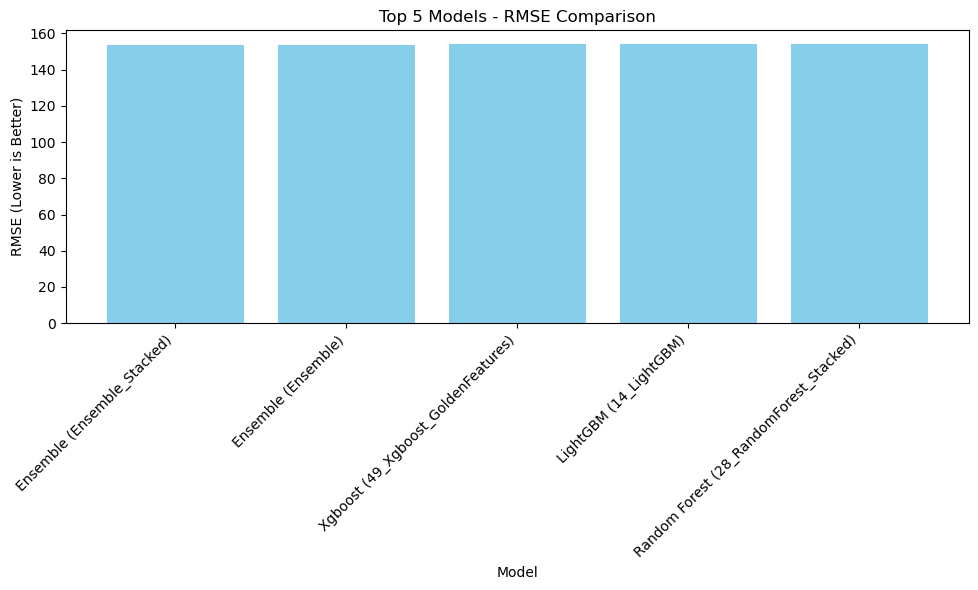

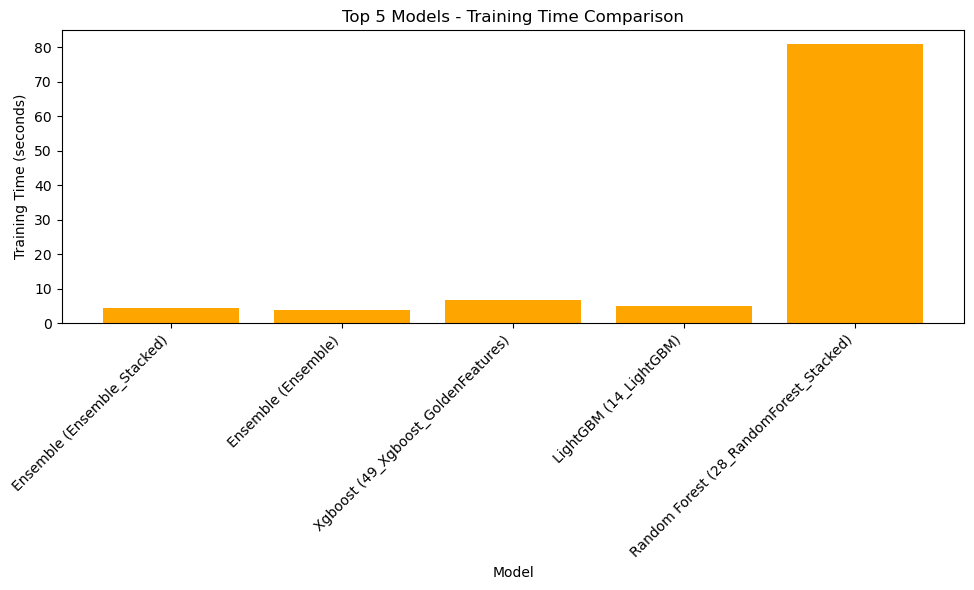

In [11]:
import matplotlib.pyplot as plt

# Select top 5 models by metric_value (lowest RMSE is best)
top_n = 5
top_models = leaderboard_all_sorted.nsmallest(top_n, "metric_value")

# Bar plot for RMSE of top models
plt.figure(figsize=(10, 6))
plt.bar(top_models["model_type"] + " (" + top_models["name"] + ")", top_models["metric_value"], color='skyblue')
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Model")
plt.title(f"Top {top_n} Models - RMSE Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for training time of top models
plt.figure(figsize=(10, 6))
plt.bar(top_models["model_type"] + " (" + top_models["name"] + ")", top_models["train_time"], color='orange')
plt.ylabel("Training Time (seconds)")
plt.xlabel("Model")
plt.title(f"Top {top_n} Models - Training Time Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()